Экземпляров: 1797
Размер изображения: 8.0x8.0
7.5235591202895
Iteration 0: mean diff = 7.523559
0.02840904489696778
Iteration 1: mean diff = 0.028409
0.0003908438449312881


C:\Users\User\AppData\Local\Temp\ipykernel_14500\3981124896.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:,0], X_reduced[:,1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),
C:\Users\User\AppData\Local\Temp\ipykernel_14500\3981124896.py:36: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X_reduced[:,0], X_reduced[:,1], c=pred_lables, cmap=plt.cm.get_cmap('nipy_spectral', 10),


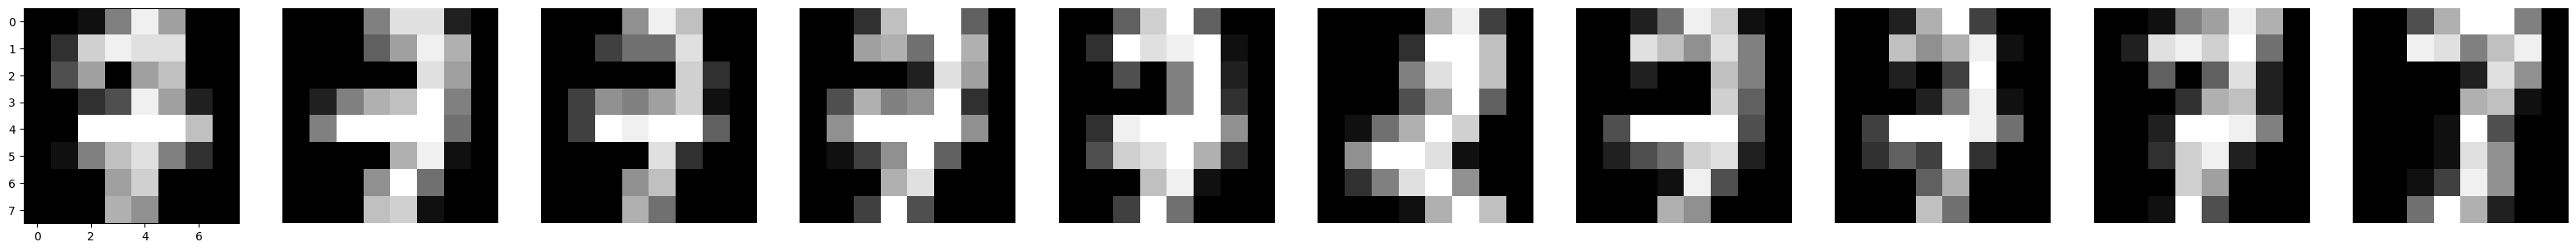

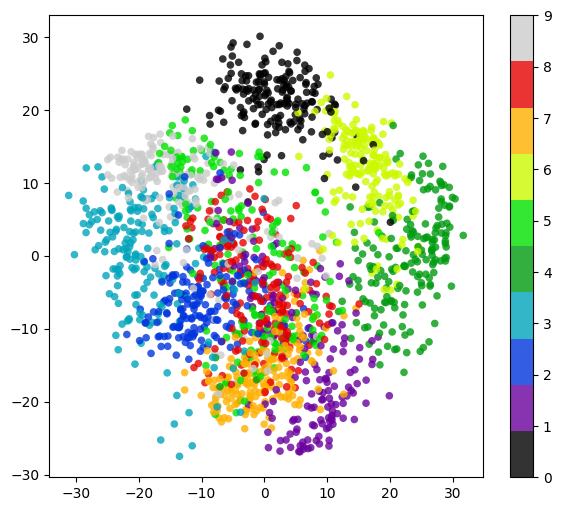

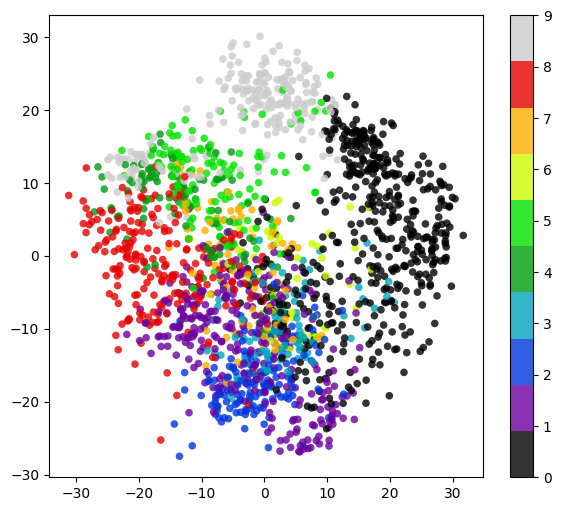

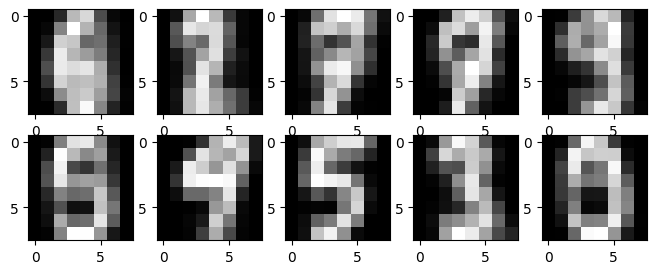

In [8]:
from kMean import *
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.load_digits(return_X_y=True)

print("Экземпляров: {}\nРазмер изображения: {}x{}".format(X.shape[0], np.sqrt(X.shape[1]), np.sqrt(X.shape[1])))

clusters_mnist, labels_mnist, cent_history = kmeans_fit_predict(X, k=10, low=np.min(X), high=np.max(X), tol=0.005)

pred_lables = labels_mnist[:, -1].astype(int)

number = 3  # Номер кластера
count = 10  # Кол-во примеров
testX = X[y == number]

testX[0, :].reshape([8, 8])
f, axes = plt.subplots(1, count, sharey=True, figsize=(40, 6))
i = 0
for x in X[pred_lables == number]:
    axes[i].imshow(x.reshape([8, 8]), cmap='gray')
    i += 1
    if i == count:
        break
    axes[i].axis('off')

pca = PCA(n_components=2, random_state=42)  # 2 компоненты, значит 2-мерное представление
X_reduced = pca.fit_transform(X)
plt.figure(figsize=(7, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30, )
plt.colorbar()

plt.figure(figsize=(7, 6))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=pred_lables, cmap=plt.cm.get_cmap('nipy_spectral', 10),
            edgecolor='none', alpha=0.8, s=30, )
plt.colorbar()

plt.figure(figsize=(8, 3))

for i, center in enumerate(clusters_mnist):
    plt.subplot(2, 5, i + 1)
    plt.imshow(center[:].reshape([8, 8]), cmap='gray')
